# DSAI Project

Dataset: https://www.kaggle.com/datasets/akshay4/road-accidents-incidence

### Our problem: How can we accurately predict the severity of traffic accidents (using geographical area, human factors, environmental conditions and vehicle conditions)? How can we effectively lower the severity of traffic accidents?


### This notebook will focus only on categorical variables which are
- Police Force
- Accident Severity
- Local Authority (District)
- Local Authority (Highway Authority - ONS code)
- 1st Road Class
- Road Type
- Junction Detail
- Junction Control
- 2nd Road Class
- Pedestrian Crossing-Human Control
- Pedestrian Crossing-Physical Facilities
- Light Conditions
- Weather Conditions
- Road Surface Conditions
- Special Conditions at Site
- Carriageway Hazards
- Urban or Rural Area
- Did Police Officer Attend Scene of Accident
- Vehicle Type
- Towing and Articulation
- Vehicle Manoeuvre
- Vehicle Location-Restricted Lane
- Junction Location
- Skidding and Overturning
- Hit Object in Carriageway
- Vehicle Leaving Carriageway
- Hit Object off Carriageway
- 1st Point of Impact
- Was Vehicle Left Hand Drive
- Journey Purpose of Driver
- Sex of Driver
- Age Band of Driver
- Vehicle Propulsion Code
- Driver IMD Decile
- Driver Home Area Type
- Casualty Class
- Sex of Casualty
- Age Band of Casualty
- Casualty Severity
- Pedestrian Location
- Pedestrian Movement
- Car Passenger
- Bus or Coach Passenger
- Pedestrian Road Maintenance Worker (From 2011)
- Casualty Type
- Casualty IMD Decile
- Casualty Home Area Type



**In this section, we will answer our first question of how we can accurately predict the severity of traffic accidents**

In [479]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import imblearn
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [480]:
#Cleaning Data
df_not_clean = pd.read_csv('Accidents.csv')
df = df_not_clean.copy()
del df["Accident_Index"]
del df["Location_Easting_OSGR"]
del df["Location_Northing_OSGR"]
del df["Longitude"]
del df["Latitude"]
del df["Date"]
del df["Time"]
del df["Day_of_Week"]
del df["Local_Authority_(Highway)"]
del df["LSOA_of_Accident_Location"]
del df["Vehicle_Reference"]
del df["Vehicle_Reference.1"]
del df["Vehicle_Reference.2"]
del df["Casualty_Reference"]
del df["Casualty_Reference.1"]
del df["Casualty_Class.1"]
            
df.dropna()
df = df.select_dtypes(exclude=['object'])

df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 54 columns):
 #   Column                                       Non-Null Count    Dtype
---  ------                                       --------------    -----
 0   Police_Force                                 1048575 non-null  int64
 1   Accident_Severity                            1048575 non-null  int64
 2   Number_of_Vehicles                           1048575 non-null  int64
 3   Number_of_Casualties                         1048575 non-null  int64
 4   Local_Authority_(District)                   1048575 non-null  int64
 5   1st_Road_Class                               1048575 non-null  int64
 6   1st_Road_Number                              1048575 non-null  int64
 7   Road_Type                                    1048575 non-null  int64
 8   Speed_limit                                  1048575 non-null  int64
 9   Junction_Detail                              1048575 non-null  int64

# Exploratory Data Analysis

In [481]:
for i in df:
    print(df[i].value_counts().sort_index())

1     143507
3       9678
4      30158
5      22942
6      44389
7      20774
10     24908
11      9602
12     14770
13     39823
14     24298
16     15967
17      6663
20     47489
21     22063
22     18972
23     10681
30     18893
31     20663
32     14425
33     17370
34      9725
35     17386
36     13250
37     12220
40      9982
41     19779
42     28623
43     39160
44     31272
45     25829
46     31481
47     28553
48      1983
50     31095
52     27571
53      8994
54      9865
55     13544
60     11246
61      6363
62     20030
63      9876
91      3978
92      6071
93      4729
94      3145
95     12933
96      3260
97     26381
98      2216
Name: Police_Force, dtype: int64
1     14500
2    138192
3    895883
Name: Accident_Severity, dtype: int64
1     317551
2     620933
3      85795
4      18126
5       4036
6       1250
7        461
8        222
9         94
10        39
11        19
12        13
13         8
14        11
15         3
16         5
17         1
18       

Based on the unique values for each variable, we have eliminated those with majority being "None" values. These variables are listed below:

- Skidding and Overturning
- Special Conditions at Site 
- Carriageway Hazards
- Hit object in carriageway 
- Vehicle Leaving Carriageway
- Hit object off carriageway 
- Driver IMD decile 
- Pedestrian road maintenance 
- Junction Control
- 2nd Road Class 



In [482]:
del df["Skidding_and_Overturning"]
del df["Special_Conditions_at_Site"]
del df["Carriageway_Hazards"]
del df["Hit_Object_in_Carriageway"]
del df["Vehicle_Leaving_Carriageway"]
del df["Hit_Object_off_Carriageway"]
del df["Driver_IMD_Decile"]
del df["Junction_Control"]
del df["2nd_Road_Class"]
del df["Pedestrian_Road_Maintenance_Worker"]


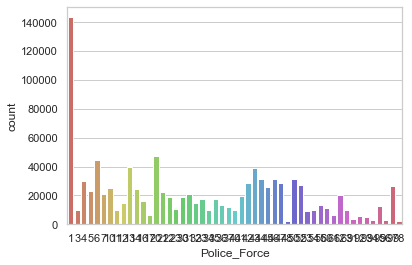

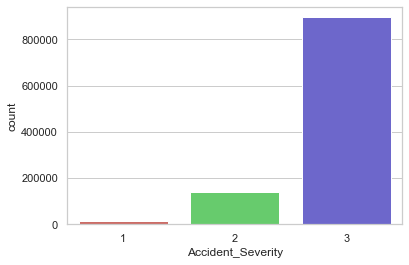

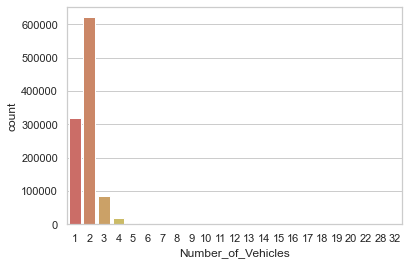

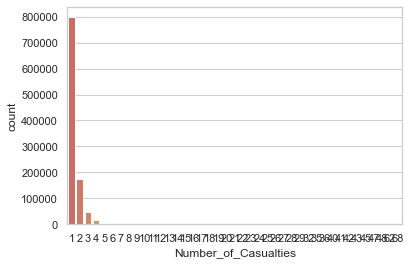

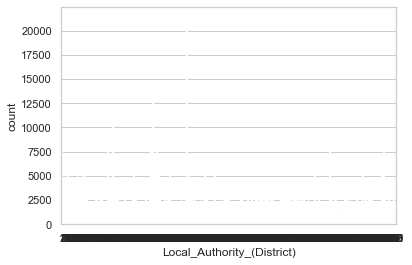

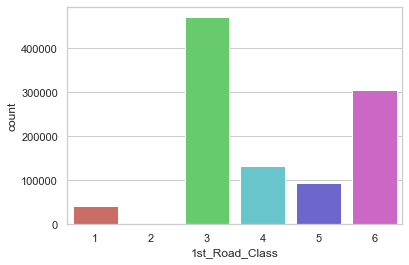

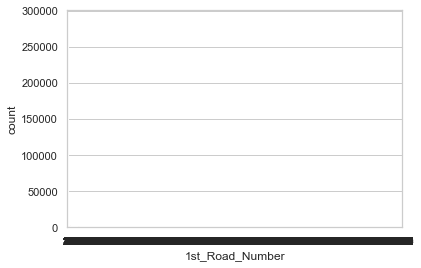

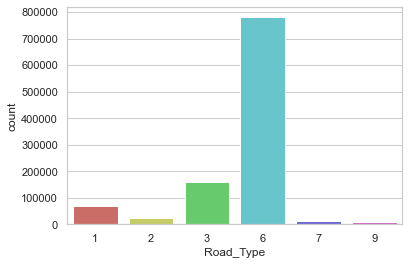

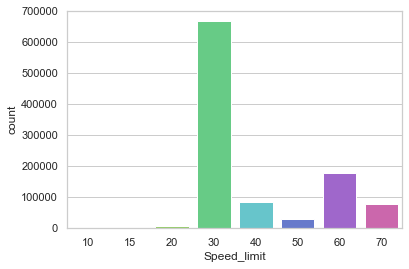

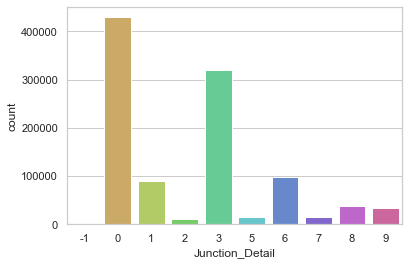

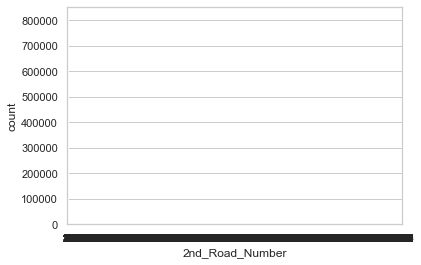

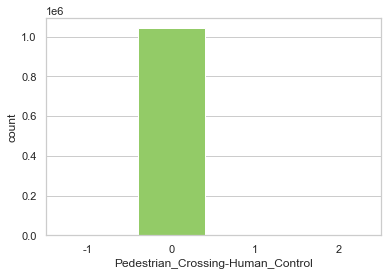

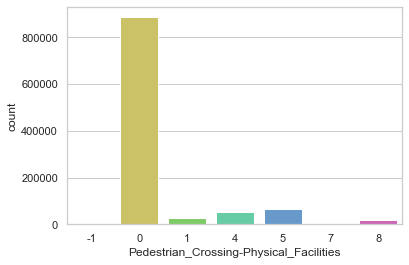

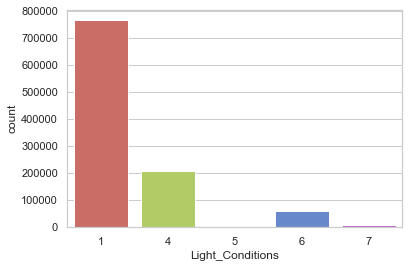

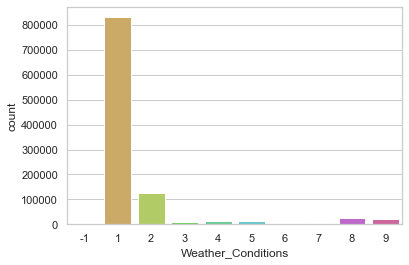

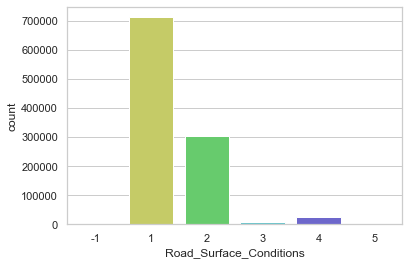

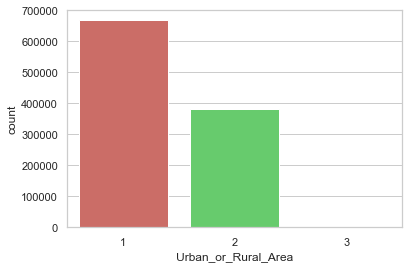

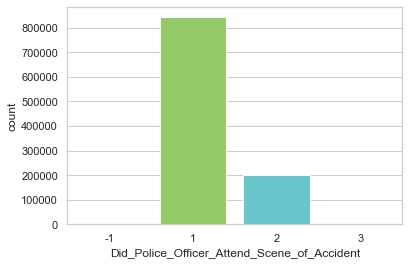

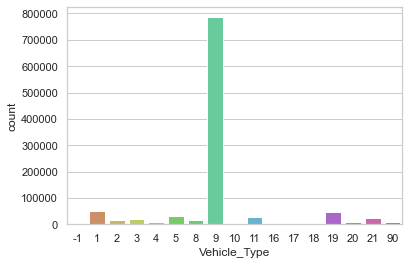

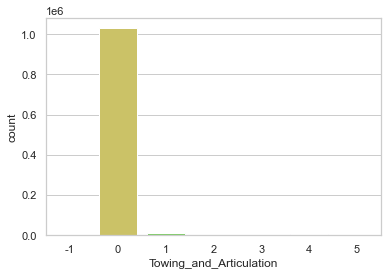

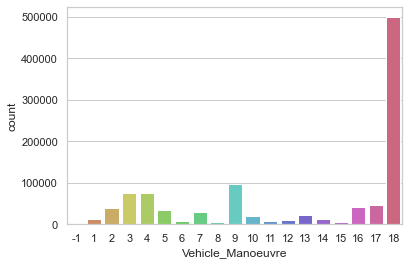

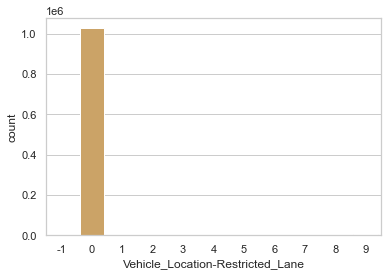

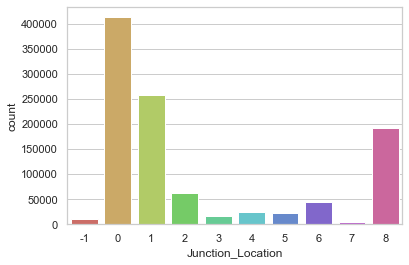

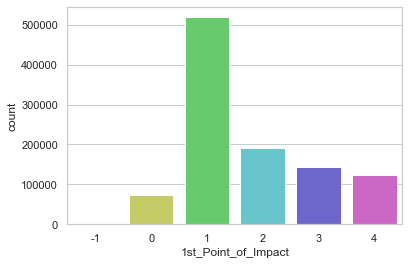

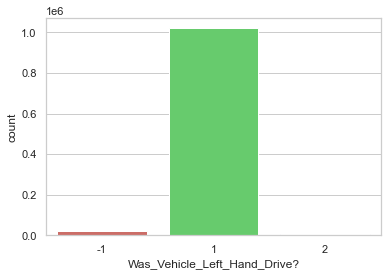

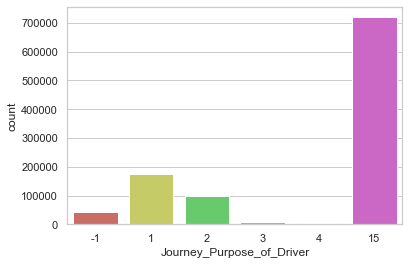

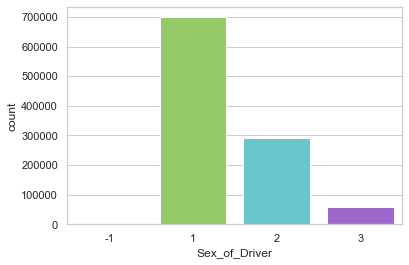

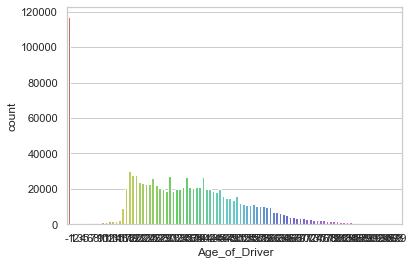

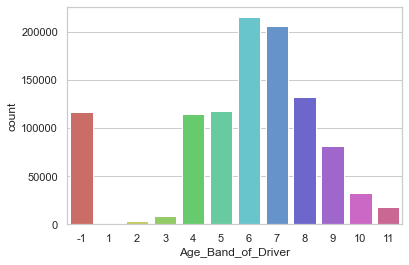

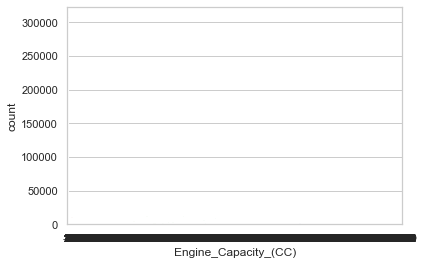

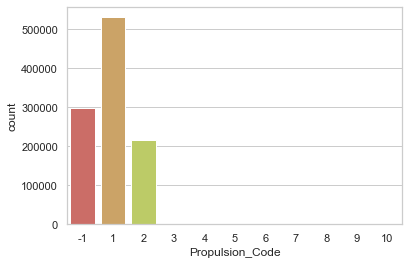

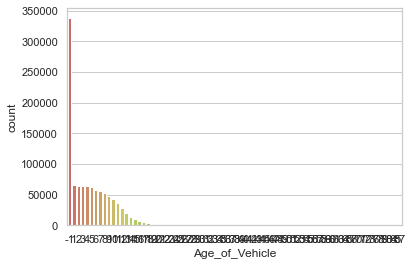

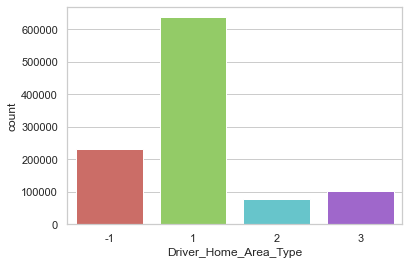

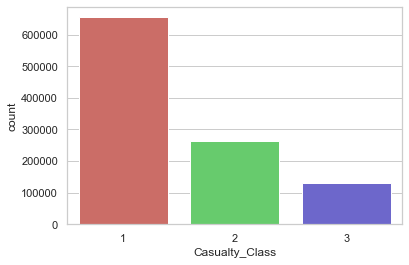

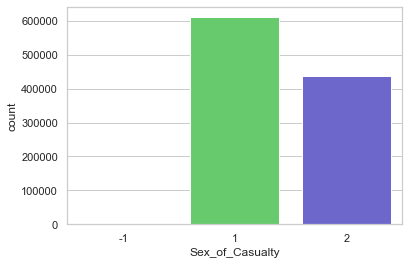

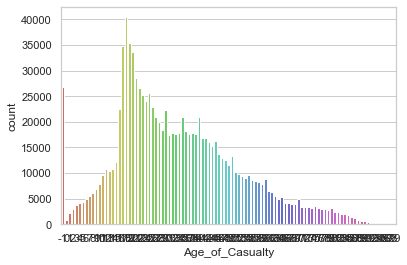

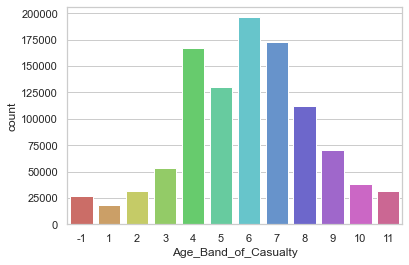

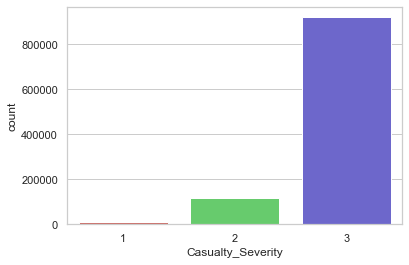

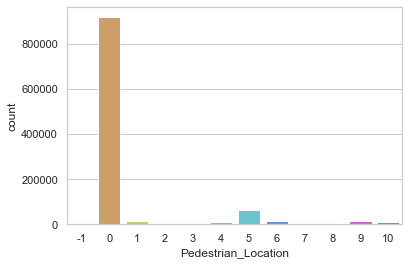

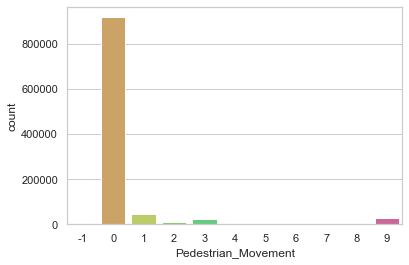

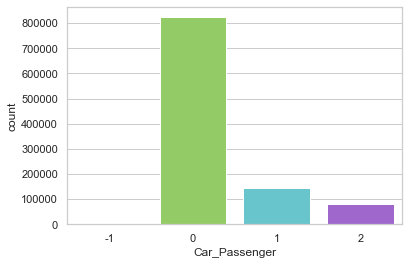

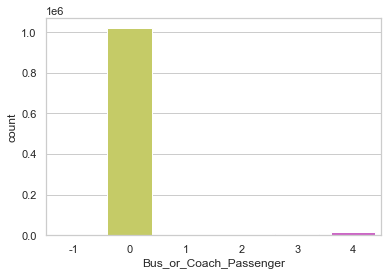

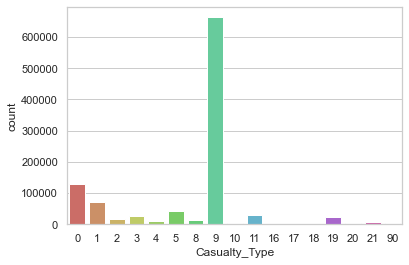

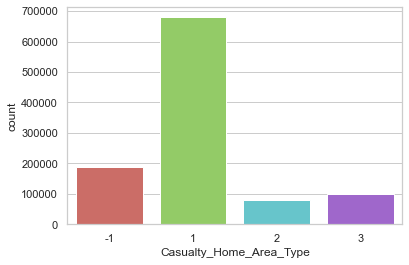

In [483]:
for i in df:
    sb.countplot(x=i, data=df, palette = 'hls')
    plt.show()




Based on the plots above, we have decided to remove the following variables due to these reasons:
- Police Force --> Majority of the accidents only involved 1 policeman. Hence, it is not helpful in determining the severity of accidents. <br><br>
- Local Authority District --> The variable is too specific to the area and cannot be applied to accidents that happen in other countries/states. Hence, it is not helpful in determining the severity of accidents. <br><br>
- Pedestrian Crossing - Human Control --> Majority of the data says no crossing within 50 metres. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Pedestrian Crossing - Physical Facilities --> Majority of the data says no facilities within 50 metres. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Did Police Attend --> "Police Force" seems to be a more useful factor and gives us more information on the number of policemen at the scene. Since we are not considering "Police Force", we will not be selecting this variable as well.<br><br>
- Junction Location --> Majority of the data says no junction. Hence, it is not helpful in determining the severity of accidents.<br><br>

- Journey Purpose --> Majority of the data is other/unknown. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Pedestrian Location --> Majority of the data says not a pedestrian. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Pedestrian Movement --> Majority of the data says not a pedestrian. Hence, it is not helpful in determining the severity of accidents.<br><br>
- 1st Road Number --> The variable is too specific to the area and cannot be applied to accidents that happen in other countries/states. Hence, it is not helpful in determining the severity of accidents. <br><br>

- 2nd Road Number --> The variable is too specific to the area and cannot be applied to accidents that happen in other countries/states. Hence, it is not helpful in determining the severity of accidents. <br><br>

- Towing and Articulation --> Majority of the data says no tow. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Vehicle Location --> Majority of the data says on main carriageway. Hence, it is not helpful in determining the severity of accidents.<br><br>

- Was left hand drive --> Majority of the data says not left hand. Hence, it is not helpful in determining the severity of accidents.<br><br>
- Propulsion code --> The variable seems ambiguous and there is no explanation given as to what the variable is specifically about. Furthermore, it cannot be applied to accidents that happen in other countries/states. Hence, it is not helpful in determining the severity of accidents. <br><br>
- Bus or coach passenger --> Majority of the data says not a passenger. Hence, it is not helpful in determining the severity of accidents.<br><br>



In [484]:
#Final Selected Variables
data_final=df[["Accident_Severity","Light_Conditions","Weather_Conditions","Road_Surface_Conditions",
                         "Road_Type", "Junction_Detail", "Urban_or_Rural_Area", "1st_Road_Class",
                         "Casualty_Type", "Casualty_Home_Area_Type","Casualty_Class","Sex_of_Casualty",
                         "Age_Band_of_Casualty", "Casualty_Severity","Vehicle_Type", "Vehicle_Manoeuvre",
                         "Sex_of_Driver", "Age_Band_of_Driver","Driver_Home_Area_Type", "Car_Passenger", "1st_Point_of_Impact"]]



# Machine Learning: Logistic Regression and Random Forest Classifier

We have decided to group related variables into different categories:

Geographical Area
- Urban_or_Rural
- Road_Type
- Casualty_Home_Area_Type
- Driver_Home_Area_Type

Human Factors
- Casualty_Type
- Age_Band_of_Casualty
- Sex_of_Casualty
- Age_Band_of_Driver
- Sex_of_driver
- 1st_Point_of_Impact
- Car_Passenger
- Casualty_Class
- Casualty_Severity

Environmental Conditions
- Light_Conditions
- Weather_Conditions
- Road_Surface_Conditions

Vehicle Conditions
- 1st_Road_Class
- Junction_Detail
- Vehicle_Type
- Vehicle_Manoeuvre


# Category: Geographical Area

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.6043465807837218
Mean Squared Error (MSE) 	: 1.3684453854647967

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.6048046637564237
Mean Squared Error (MSE) 	: 1.3660965905951263

The recall for this model is : 0.6048046637564237


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.61      0.65      0.63    167770
           2       0.00      0.00      0.00     25901
           3       0.60      0.65      0.62    168269

    accuracy                           0.60    361940
   macro avg       0.40      0.43      0.42    361940
weighted avg       0.56      0.60      0.58    361940



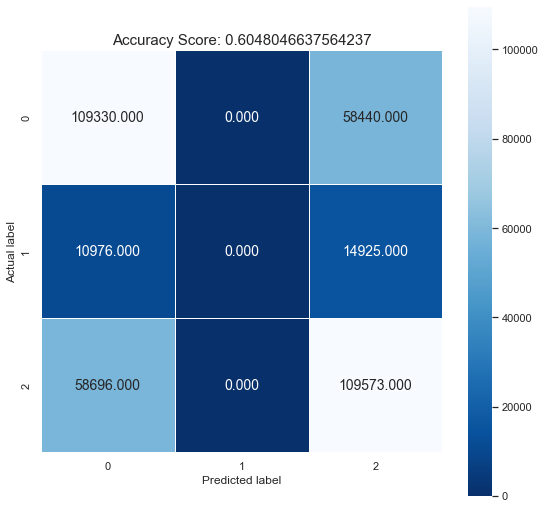

In [485]:
X = data_final[["Urban_or_Rural_Area", "Road_Type", "Casualty_Home_Area_Type", "Driver_Home_Area_Type" ]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over1, y_over1 = oversample.fit_resample(X, y)

sample_df1 = pd.DataFrame(X_over1)
sample_df2 = pd.DataFrame(y_over1)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over1,y_over1, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

y_train_pred1 = logreg.predict(X_train1)
y_test_pred1 = logreg.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train1, y_train1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train1, y_train_pred1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test1, y_test1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test1, y_test_pred1))
print()

score = logreg.score(X_test1, y_test1)

matrix = metrics.confusion_matrix(y_test1, y_test_pred1)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test1, y_test_pred1)
print("The recall for this model is :",((matrix[0,0]+matrix[1,1]+matrix[2,2])/((matrix[0,0]+matrix[1,1]+matrix[2,2]) + (matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[1,2]+matrix[2,0]+matrix[2,1]))))

report = classification_report(y_test1, y_test_pred1)
print(report)

### Random Forest Classifier Model

No handles with labels found to put in legend.


Random Forest Classifier Accuracy: 0.6150687959330275


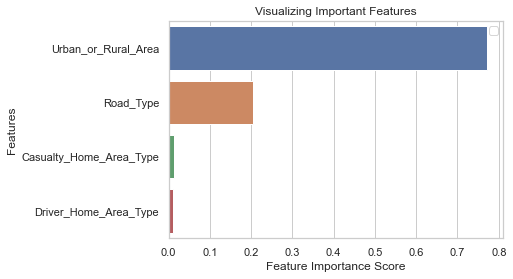

              precision    recall  f1-score   support

           1       0.63      0.64      0.63    167770
           2       0.00      0.00      0.00     25901
           3       0.60      0.68      0.64    168269

    accuracy                           0.62    361940
   macro avg       0.41      0.44      0.43    361940
weighted avg       0.57      0.62      0.59    361940



In [486]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train1)

y_pred1=clf.predict(X_test1)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test1, y_pred1))


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=["Urban_or_Rural_Area", "Road_Type", "Casualty_Home_Area_Type", "Driver_Home_Area_Type" ]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

report = classification_report(y_test1, y_pred1)
print(report)


The models have a high classification accuracy score of approximately 0.6 despite the recall values being roughly the same for the severe(1) and slight(1) categories. Hence, this category is significant in determining the severity of accidents.

# Category: Human Factors

### Logistic Regression Model

/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.46985686744280086
Mean Squared Error (MSE) 	: 1.9052160160348257

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.47043495081242404
Mean Squared Error (MSE) 	: 1.9051729855200619

The recall for this model is : 0.47043495081242404


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.50      0.49    168606
           2       0.00      0.00      0.00     25704
           3       0.47      0.51      0.49    167570

    accuracy                           0.47    361880
   macro avg       0.31      0.34      0.33    361880
weighted avg       0.44      0.47      0.45    361880



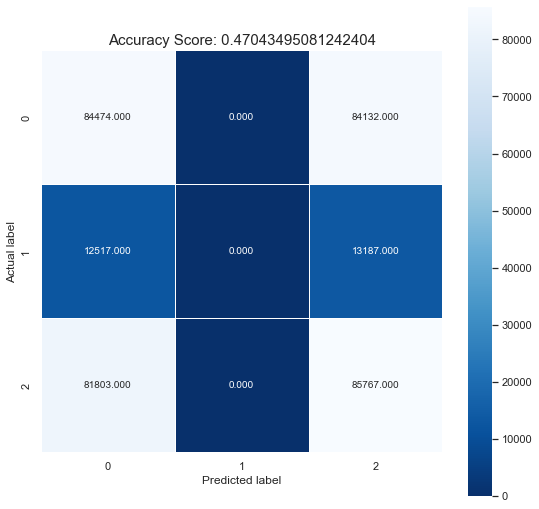

In [487]:
X = data_final[[ "Casualty_Type","Casualty_Class","Sex_of_Casualty", "Car_Passenger", "Age_Band_of_Casualty", "Casualty_Severity", "Sex_of_Driver", "Age_Band_of_Driver","1st_Point_of_Impact" ]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over2, y_over2 = oversample.fit_resample(X, y)

sample_df3 = pd.DataFrame(X_over2)
sample_df4 = pd.DataFrame(y_over2)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over2,y_over2, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)

y_train_pred2 = logreg.predict(X_train2)
y_test_pred2 = logreg.predict(X_test2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train2, y_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2, y_train_pred2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test2, y_test2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_test_pred2))
print()

score = logreg.score(X_test2, y_test2)

matrix = metrics.confusion_matrix(y_test2, y_test_pred2)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test2, y_test_pred2)
print("The recall for this model is :",((matrix[0,0]+matrix[1,1]+matrix[2,2])/((matrix[0,0]+matrix[1,1]+matrix[2,2]) + (matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[1,2]+matrix[2,0]+matrix[2,1]))))

report = classification_report(y_test2, y_test_pred2)
print(report)




### Random Forest Classifier Model

No handles with labels found to put in legend.


Random Forest Classifier Accuracy: 0.6607438930032055




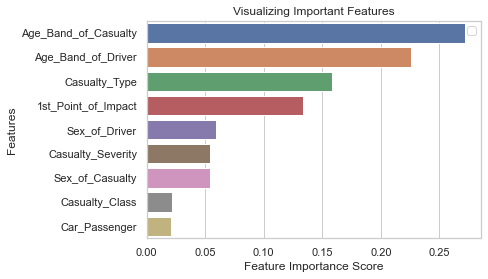

              precision    recall  f1-score   support

           1       0.65      0.80      0.72    168606
           2       0.14      0.01      0.01     25704
           3       0.68      0.62      0.65    167570

    accuracy                           0.66    361880
   macro avg       0.49      0.48      0.46    361880
weighted avg       0.63      0.66      0.64    361880



In [488]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train2,y_train2)

y_pred2=clf.predict(X_test2)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

print('\n')
# Creating a bar plot
feature_imp1 = pd.Series(clf.feature_importances_,index=[ "Casualty_Type","Casualty_Class","Sex_of_Casualty", "Car_Passenger", "Age_Band_of_Casualty", "Casualty_Severity", "Sex_of_Driver", "Age_Band_of_Driver","1st_Point_of_Impact" ]).sort_values(ascending=False)
sns.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

report = classification_report(y_test2, y_pred2)
print(report)

The Random Forest Classifier model has a higher classification accuracy score of 0.66 as compared to the Logistic Regression model, with much higher recall values for the severe(1) category as compared to the slight(3) one. Hence, this category may potentially be significant in determining the severity of accidents.

# Category: Environmental Conditions

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5387359038746037
Mean Squared Error (MSE) 	: 1.6298381881792439

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.5403621832692663
Mean Squared Error (MSE) 	: 1.6249720196429016

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.58      0.41      0.48    168018
           2       0.00      0.00      0.00     25762
           3       0.52      0.75      0.62    168081

    accuracy                           0.54    361861
   macro avg       0.37      0.39      0.37    361861
weighted avg       0.51      0.54      0.51    361861



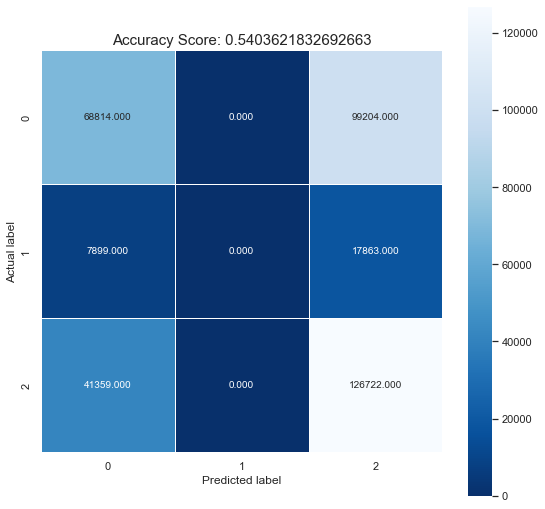

In [489]:
X = data_final[[ "Light_Conditions","Weather_Conditions","Road_Surface_Conditions"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over3, y_over3 = oversample.fit_resample(X, y)

sample_df5 = pd.DataFrame(X_over3)
sample_df6 = pd.DataFrame(y_over3)



X_train3, X_test3, y_train3, y_test3 = train_test_split(X_over3,y_over3, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train3, y_train3)

y_train_pred3 = logreg.predict(X_train3)
y_test_pred3 = logreg.predict(X_test3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train3, y_train3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train3, y_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test3, y_test3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test3, y_test_pred3))
print()

score = logreg.score(X_test3, y_test3)
matrix = metrics.confusion_matrix(y_test3, y_test_pred3)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test3, y_test_pred3)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test3, y_test_pred3)
print(report)


### Random Forest Classifier Model

No handles with labels found to put in legend.


Random Forest Classifier Accuracy: 0.5480115292888705


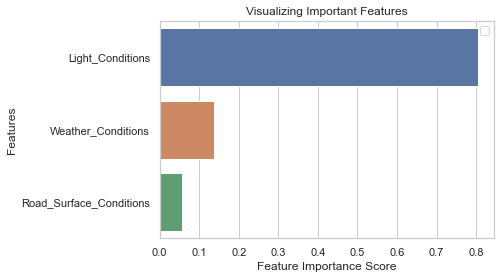

              precision    recall  f1-score   support

           1       0.61      0.39      0.48    168018
           2       0.40      0.00      0.00     25762
           3       0.52      0.79      0.63    168081

    accuracy                           0.55    361861
   macro avg       0.51      0.39      0.37    361861
weighted avg       0.55      0.55      0.51    361861



In [490]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train3,y_train3)

y_pred3=clf.predict(X_test3)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp2 = pd.Series(clf.feature_importances_,index=["Light_Conditions","Weather_Conditions","Road_Surface_Conditions"]).sort_values(ascending=False)
sns.barplot(x=feature_imp2, y=feature_imp2.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

report = classification_report(y_test3, y_pred3)
print(report)


Both models have a lower classification accuracy of about 0.54 as compared to that in other categories. Hence, this category may not be as significant in determining the severity of accidents.

# Category: Vehicle Conditions

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5554505504020132
Mean Squared Error (MSE) 	: 1.5630339489030185

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.556781536778055
Mean Squared Error (MSE) 	: 1.560313025889297

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.55      0.69      0.61    168274
           2       0.00      0.00      0.00     25641
           3       0.57      0.51      0.54    167972

    accuracy                           0.56    361887
   macro avg       0.37      0.40      0.38    361887
weighted avg       0.52      0.56      0.53    361887



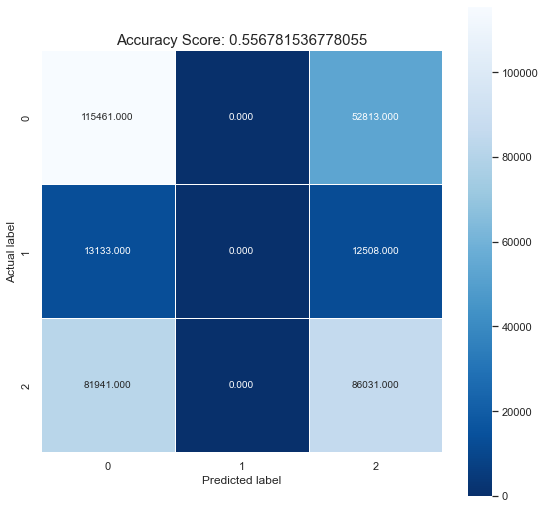

In [491]:
X = data_final[["Junction_Detail", "1st_Road_Class","Vehicle_Type", "Vehicle_Manoeuvre"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over4, y_over4 = oversample.fit_resample(X, y)


sample_df7 = pd.DataFrame(X_over4)
sample_df8 = pd.DataFrame(y_over4)


X_train4, X_test4, y_train4, y_test4 = train_test_split(X_over4,y_over4, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train4, y_train4)

y_train_pred4 = logreg.predict(X_train4)
y_test_pred4 = logreg.predict(X_test4)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train4, y_train4))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train4, y_train_pred4))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test4, y_test4))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test4, y_test_pred4))
print()

score = logreg.score(X_test4, y_test4)
matrix = metrics.confusion_matrix(y_test4, y_test_pred4)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test4, y_test_pred4)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test4, y_test_pred4)
print(report)

### Random Forest Classifier Model

No handles with labels found to put in legend.


Random Forest Classifier Accuracy: 0.6153191465844311


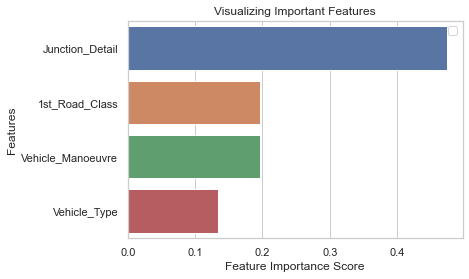

              precision    recall  f1-score   support

           1       0.63      0.64      0.64    168274
           2       0.09      0.00      0.00     25641
           3       0.60      0.68      0.64    167972

    accuracy                           0.62    361887
   macro avg       0.44      0.44      0.43    361887
weighted avg       0.58      0.62      0.59    361887



In [492]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train4,y_train4)

y_pred4=clf.predict(X_test4)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp3 = pd.Series(clf.feature_importances_,index=["Junction_Detail", "1st_Road_Class","Vehicle_Type", "Vehicle_Manoeuvre"]).sort_values(ascending=False)
sns.barplot(x=feature_imp3, y=feature_imp3.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

report = classification_report(y_test4, y_pred4)
print(report)



The Random Forest Classifier model has a higher classification accuracy of 0.62 as compared to the Logistic Regression model, even though the recall values remained roughly the same for both severe(1) and slight(3) categories in both models. Hence, this category may be significant in determining the severity of accidents.

Based on the models implemented, the categories: "Geographical Area", "Human Factors" and "Vehicle Conditions" are more significant in determining the severity of accidents.

Hence, we will be exploring the two most important features for these categories:

**Category: Geographical Area**: 
- Urban_or_Rural
- Road_Type

**Category: Human Factors**
- Age_Band_of_Casualty
- Age_Band_of_Driver

**Category: Vehicle Conditions**
- Junction_Detail
- Vehicle_Manoeuvre

For vehicle conditions, 1st Road Class was the second most important feature but the variables classified under this does not give us clear information on what they are about. Hence, we will not be able to do meaningful analysis on it. We have decided to focus on the next most important feature which is Vehicle Manoeuvre which had almost about the same amount of importance as 1st Road Class. 

# Focusing on significant variables: Urban or Rural Area VS Road Type

## Urban or Rural Area

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.6040733107529437
Mean Squared Error (MSE) 	: 1.3692860655420676

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.6050054286716745
Mean Squared Error (MSE) 	: 1.3661797898703474

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.61      0.65      0.63    167783
           2       0.00      0.00      0.00     25796
           3       0.60      0.65      0.62    168388

    accuracy                           0.61    361967
   macro avg       0.40      0.43      0.42    361967
weighted avg       0.56      0.61      0.58    361967



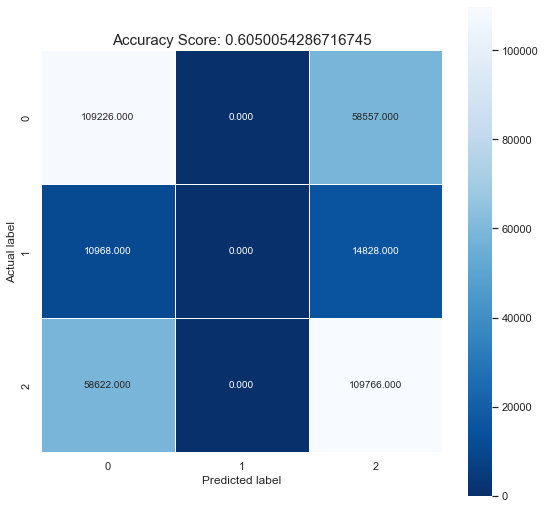

In [493]:
X = data_final[["Urban_or_Rural_Area"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over01, y_over01 = oversample.fit_resample(X, y)

sample_df01 = pd.DataFrame(X_over01)
sample_df02 = pd.DataFrame(y_over01)


X_train01, X_test01, y_train01, y_test01 = train_test_split(X_over01,y_over01, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train01, y_train01)

y_train_pred01 = logreg.predict(X_train01)
y_test_pred01 = logreg.predict(X_test01)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train01, y_train01))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train01, y_train_pred01))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test01, y_test01))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test01, y_test_pred01))
print()

score = logreg.score(X_test01, y_test01)
matrix = metrics.confusion_matrix(y_test01, y_test_pred01)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test01, y_test_pred01)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test01, y_test_pred01)
print(report)

### Random Forest Classifier Model

In [494]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train01,y_train01)

y_pred01=clf.predict(X_test01)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test01, y_pred01))

report = classification_report(y_test01, y_pred01)
print(report)

Random Forest Classifier Accuracy: 0.6050772584241105


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.61      0.65      0.63    167783
           2       0.00      0.00      0.00     25796
           3       0.60      0.65      0.62    168388

    accuracy                           0.61    361967
   macro avg       0.40      0.43      0.42    361967
weighted avg       0.56      0.61      0.58    361967



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Both models produced a high classification accuracy of about 0.60 even though the recall values remained roughly the same.

## Road Type

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.4688311520879914
Mean Squared Error (MSE) 	: 1.9108924749798328

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.4669797637958423
Mean Squared Error (MSE) 	: 1.9169859796947304

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.46      0.76      0.58    167614
           2       0.00      0.00      0.00     25953
           3       0.48      0.24      0.32    168408

    accuracy                           0.47    361975
   macro avg       0.31      0.34      0.30    361975
weighted avg       0.44      0.47      0.42    361975



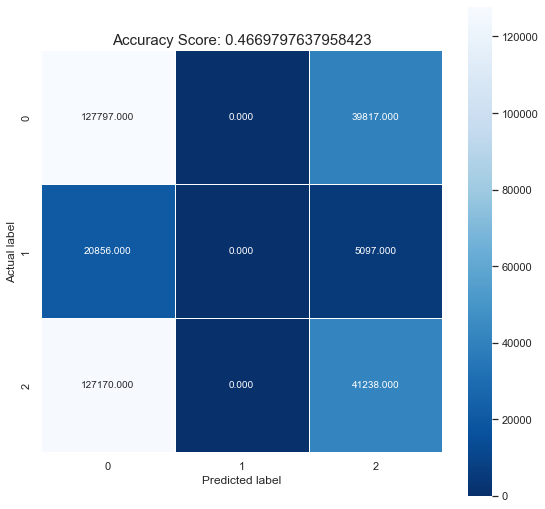

In [495]:
X = data_final[["Road_Type"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over02, y_over02 = oversample.fit_resample(X, y)

sample_df03 = pd.DataFrame(X_over02)
sample_df04 = pd.DataFrame(y_over02)


X_train02, X_test02, y_train02, y_test02 = train_test_split(X_over02,y_over02, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train02, y_train02)

y_train_pred02 = logreg.predict(X_train02)
y_test_pred02 = logreg.predict(X_test02)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train02, y_train02))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train02, y_train_pred02))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test02, y_test02))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test02, y_test_pred02))
print()

score = logreg.score(X_test02, y_test02)
matrix = metrics.confusion_matrix(y_test02, y_test_pred02)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test02, y_test_pred02)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test02, y_test_pred02)
print(report)

### Random Forest Classifier Model

In [496]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train02,y_train02)

y_pred02=clf.predict(X_test02)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test02, y_pred02))

report = classification_report(y_test02, y_pred02)
print(report)

Random Forest Classifier Accuracy: 0.4973326887215968


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.48      0.96      0.64    167614
           2       0.00      0.00      0.00     25953
           3       0.69      0.11      0.19    168408

    accuracy                           0.50    361975
   macro avg       0.39      0.36      0.28    361975
weighted avg       0.55      0.50      0.39    361975



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparing "Urban or Rural Area" and "Road Type", the models for "Road Type" produced a much lower classification accuracy score of 0.47 (for the Logistic Regression model) and 0.50 (for the Random Forest Classifier model). Although the recall values are definitely higher for the severe(1) category as compared to the slight(1) category for the models for "Road Type", both the classification accuracy and the precision values for the severe category is way too low. Hence, we have decided to go with "Urban or Rural Area" as a more significant variable in determining the severity of accidents.
 

# Focusing on significant variables: Junction Detail VS Vehicle Manoeuvre

## Junction Detail

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5450131135670837
Mean Squared Error (MSE) 	: 1.6038348547282077

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.5454110806187282
Mean Squared Error (MSE) 	: 1.6057251982235192

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.54      0.66      0.59    167892
           2       0.00      0.00      0.00     25646
           3       0.56      0.51      0.53    168301

    accuracy                           0.55    361839
   macro avg       0.36      0.39      0.38    361839
weighted avg       0.51      0.55      0.52    361839



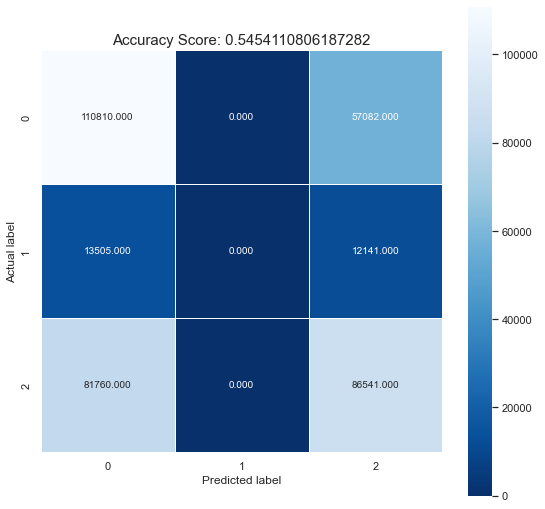

In [497]:
X = data_final[["Junction_Detail"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over5, y_over5 = oversample.fit_resample(X, y)

sample_df9 = pd.DataFrame(X_over5)
sample_df10 = pd.DataFrame(y_over5)


X_train5, X_test5, y_train5, y_test5 = train_test_split(X_over5,y_over5, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train5, y_train5)

y_train_pred5 = logreg.predict(X_train5)
y_test_pred5 = logreg.predict(X_test5)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train5, y_train5))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train5, y_train_pred5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test5, y_test5))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test5, y_test_pred5))
print()

score = logreg.score(X_test5, y_test5)
matrix = metrics.confusion_matrix(y_test5, y_test_pred5)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test5, y_test_pred5)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test5, y_test_pred5)
print(report)

### Random Forest Classifier Model 

In [498]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train5,y_train5)

y_pred5=clf.predict(X_test5)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

report = classification_report(y_test5, y_pred5)
print(report)

Random Forest Classifier Accuracy: 0.5782958719209372


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.57      0.65      0.61    167892
           2       0.00      0.00      0.00     25646
           3       0.58      0.59      0.59    168301

    accuracy                           0.58    361839
   macro avg       0.39      0.41      0.40    361839
weighted avg       0.54      0.58      0.56    361839



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Random Forest Classifier has a higher classification accuracy of 0.58 as compared to the Logisitc Regression model and the recall value is slightly higher for the severe(1) category as compared to the slight(3) category.

## Vehicle_Manoeuvre

### Logistic Regression Model 

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.4681899905682622
Mean Squared Error (MSE) 	: 1.9127048455552935

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.4679952141343303
Mean Squared Error (MSE) 	: 1.913906918781207

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.59      0.52    168417
           2       0.00      0.00      0.00     25829
           3       0.47      0.42      0.44    167653

    accuracy                           0.47    361899
   macro avg       0.31      0.34      0.32    361899
weighted avg       0.43      0.47      0.45    361899



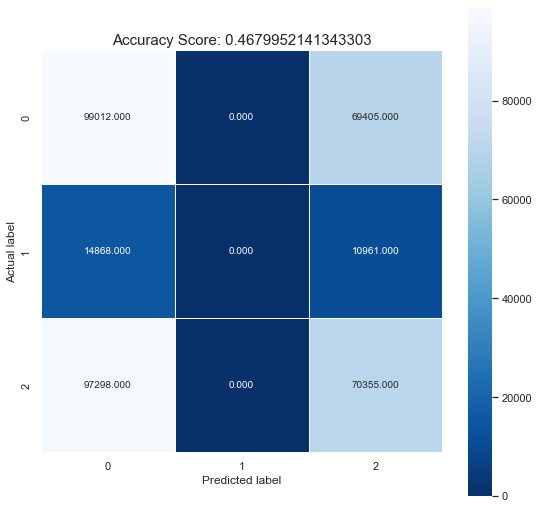

In [499]:
X = data_final[["Vehicle_Manoeuvre"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over6, y_over6 = oversample.fit_resample(X, y)

sample_df11 = pd.DataFrame(X_over6)
sample_df12 = pd.DataFrame(y_over6)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X_over6,y_over6, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train6, y_train6)

y_train_pred6 = logreg.predict(X_train6)
y_test_pred6 = logreg.predict(X_test6)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train6, y_train6))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train6, y_train_pred6))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test6, y_test6))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test6, y_test_pred6))
print()

score = logreg.score(X_test6, y_test6)
matrix = metrics.confusion_matrix(y_test6, y_test_pred6)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test6, y_test_pred6)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test6, y_test_pred6)
print(report)

### Random Forest Classifier Model

In [500]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train6,y_train6)

y_pred6=clf.predict(X_test6)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

report = classification_report(y_test6, y_pred6)
print(report)


Random Forest Classifier Accuracy: 0.4708109168580184


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.65      0.55    168417
           2       0.00      0.00      0.00     25829
           3       0.47      0.37      0.41    167653

    accuracy                           0.47    361899
   macro avg       0.31      0.34      0.32    361899
weighted avg       0.44      0.47      0.44    361899



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparing "Junction Detail" and "Vehicle Manoeuvre", although have a higher recall value for the severe(1) category as compared to the slight(3) category for both models, Junction Detail has a higher classification accuracy for both models. Hence, "Junction Detail" is more significant in determining the severity of accidents

# Focusing on significant variables: Age Band of Casualty VS Driver

## Age Band of Casualty

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.4648581088984616
Mean Squared Error (MSE) 	: 1.9263369152650713

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.4658782570252273
Mean Squared Error (MSE) 	: 1.9210383797076622

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.60      0.52    167902
           2       0.00      0.00      0.00     25991
           3       0.47      0.41      0.44    168017

    accuracy                           0.47    361910
   macro avg       0.31      0.33      0.32    361910
weighted avg       0.43      0.47      0.44    361910



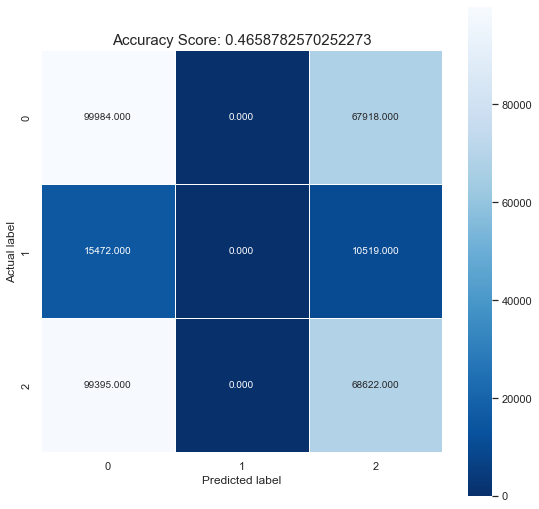

In [501]:
X = data_final[["Age_Band_of_Casualty"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over7, y_over7 = oversample.fit_resample(X, y)

sample_df13 = pd.DataFrame(X_over7)
sample_df14 = pd.DataFrame(y_over7)


X_train7, X_test7, y_train7, y_test7 = train_test_split(X_over7,y_over7, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train7, y_train7)

y_train_pred7 = logreg.predict(X_train7)
y_test_pred7 = logreg.predict(X_test7)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train7, y_train7))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train7, y_train_pred7))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test7, y_test7))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test7, y_test_pred7))
print()

score = logreg.score(X_test7, y_test7)
matrix = metrics.confusion_matrix(y_test7, y_test_pred7)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test7, y_test_pred7)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test7, y_test_pred7)
print(report)

### Random Forest Classifier Model

In [502]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train7,y_train7)

y_pred7=clf.predict(X_test7)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

report = classification_report(y_test7, y_pred7)
print(report)


Random Forest Classifier Accuracy: 0.47234947915227543


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.59      0.52    167902
           2       0.00      0.00      0.00     25991
           3       0.47      0.43      0.45    168017

    accuracy                           0.47    361910
   macro avg       0.32      0.34      0.32    361910
weighted avg       0.44      0.47      0.45    361910



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Both models have very low classification accuracy scores of 0.47, although the recall values for the severe(1) category is higher than that of the slight(3) category.

## Age Band of Driver

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.4655202107975734
Mean Squared Error (MSE) 	: 1.9228315839013577

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.4654032443006463
Mean Squared Error (MSE) 	: 1.924432275016785

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.66      0.54    168028
           2       0.00      0.00      0.00     25812
           3       0.47      0.35      0.40    168087

    accuracy                           0.47    361927
   macro avg       0.31      0.33      0.31    361927
weighted avg       0.43      0.47      0.44    361927



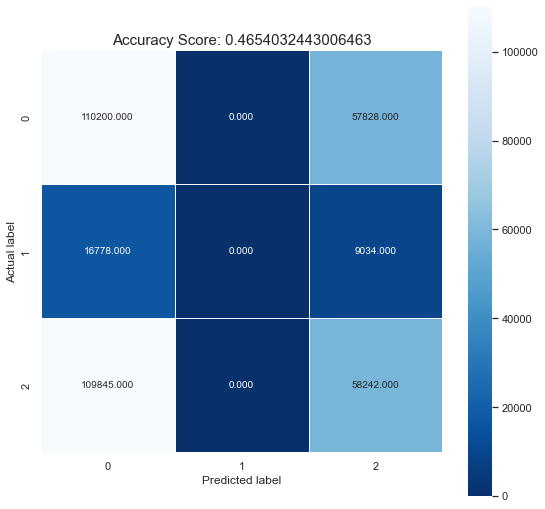

In [503]:
X = data_final[["Age_Band_of_Driver"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over8, y_over8 = oversample.fit_resample(X, y)


sample_df15 = pd.DataFrame(X_over8)
sample_df16 = pd.DataFrame(y_over8)

X_train8, X_test8, y_train8, y_test8 = train_test_split(X_over8,y_over8, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train8, y_train8)

y_train_pred8 = logreg.predict(X_train8)
y_test_pred8 = logreg.predict(X_test8)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train8, y_train8))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train8, y_train_pred8))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test8, y_test8))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test8, y_test_pred8))
print()

score = logreg.score(X_test8, y_test8)
matrix = metrics.confusion_matrix(y_test8, y_test_pred8)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test8, y_test_pred8)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test8, y_test_pred8)
print(report)

### Random Forest Classifier Model

In [504]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train8,y_train8)

y_pred8=clf.predict(X_test8)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

report = classification_report(y_test8, y_pred8)
print(report)



Random Forest Classifier Accuracy: 0.4683927974425782


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.47      0.46      0.47    168028
           2       0.00      0.00      0.00     25812
           3       0.47      0.55      0.50    168087

    accuracy                           0.47    361927
   macro avg       0.31      0.34      0.32    361927
weighted avg       0.44      0.47      0.45    361927



/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparing "Age band of casualty" with "Age band of driver", although the recall values of both features vary between the severe(1) and slight(3) accidents categories, they have the same low accuracy of less than 0.50. Hence, they are not very significant in determining the severity of accidents as compared to variables in other categories.

## Conclusion of Machine Learning analysis for categorical variables

Based on the classification accuracies of the models and the recall values for the severe category, the categorical variables Urban_or_Rural_Area and Junction_Detail are the most significant in determining the severity of accidents.

# Machine Learning: Numeric and Categorical Variables

From our analysis of numeric and categorical variables, the most significant: 
- numeric variable is Speed Limit.
- categorical variables are Urban or Rural Area, and Junction Detail.

Hence, we decided to apply machine learning on these variables to determine their overall significance in determining severity of accidents. 

/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.6179029607687093
Mean Squared Error (MSE) 	: 1.3138659843192737

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.6157799767331972
Mean Squared Error (MSE) 	: 1.3211785934361089

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.63      0.65      0.64    167663
           2       0.00      0.00      0.00     26020
           3       0.60      0.68      0.64    168206

    accuracy                           0.62    361889
   macro avg       0.41      0.44      0.43    361889
weighted avg       0.57      0.62      0.59    361889



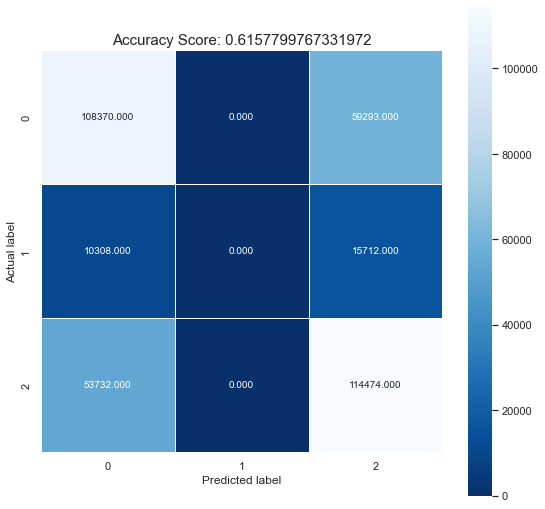

In [505]:
X = df[["Junction_Detail","Urban_or_Rural_Area", "Speed_limit"]]
y = df["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over9, y_over9 = oversample.fit_resample(X, y)


sample_df17 = pd.DataFrame(X_over9)
sample_df18 = pd.DataFrame(y_over9)

X_train9, X_test9, y_train9, y_test9 = train_test_split(X_over9,y_over9, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train9, y_train9)

y_train_pred9 = logreg.predict(X_train9)
y_test_pred9 = logreg.predict(X_test9)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train9, y_train9))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train9, y_train_pred9))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test9, y_test9))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test9, y_test_pred9))
print()

score = logreg.score(X_test9, y_test9)
matrix = metrics.confusion_matrix(y_test9, y_test_pred9)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test9, y_test_pred9)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test9, y_test_pred9)
print(report)

### Random Forest Classifier

In [506]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train9,y_train9)

y_pred9=clf.predict(X_test9)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test9, y_pred9))

report = classification_report(y_test9, y_pred9)
print(report)


Random Forest Classifier Accuracy: 0.6305137763236793
              precision    recall  f1-score   support

           1       0.64      0.68      0.66    167663
           2       0.25      0.00      0.00     26020
           3       0.62      0.68      0.65    168206

    accuracy                           0.63    361889
   macro avg       0.50      0.45      0.44    361889
weighted avg       0.60      0.63      0.61    361889



Both models have high classification accuracies, although the recall values remain roughly the same for both severe(1) and slight(3) categories. This confirms that these variables are the most significant in determining the severity of accidents. 


Hence, to answer our first question:

**We can accurately predict the severity of accidents using speed limits, types of junctions and geographical factors (Urban or Rural Area).**

# Data Driven Insights

Now, we will be answering our second question: How can we effectively lower the severity of traffic accidents?


Since junction detail had a higher recall value for severe(1) category as compared to the slight(3) category, and it is more controllable factor as compared to "Urban and Rural Area" (which is out of our control), we have decided to focus on this variable instead. 

So, we have reimplemented the model from above, below for easier comparison.

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5472263799019044
Mean Squared Error (MSE) 	: 1.5965192161558477

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.5463370287268025
Mean Squared Error (MSE) 	: 1.5993666618770241

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.54      0.66      0.60    168095
           2       0.00      0.00      0.00     25970
           3       0.56      0.51      0.53    167827

    accuracy                           0.55    361892
   macro avg       0.37      0.39      0.38    361892
weighted avg       0.51      0.55      0.52    361892



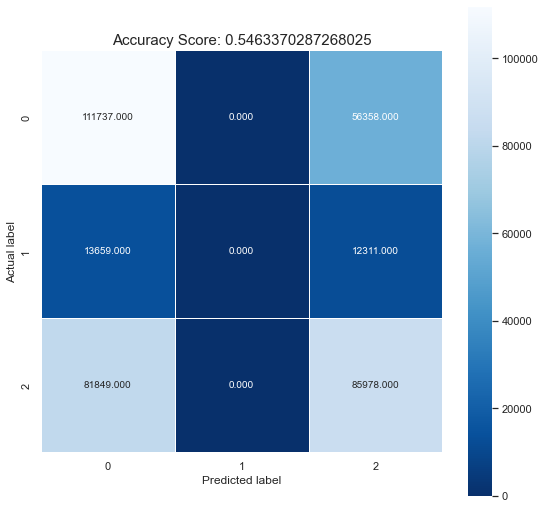

In [645]:
X = data_final[["Junction_Detail"]]
y = data_final["Accident_Severity"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X = X_train
y = y_train


oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority')
X_over5, y_over5 = oversample.fit_resample(X, y)

sample_df9 = pd.DataFrame(X_over5)
sample_df10 = pd.DataFrame(y_over5)


X_train5, X_test5, y_train5, y_test5 = train_test_split(X_over5,y_over5, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train5, y_train5)

y_train_pred5 = logreg.predict(X_train5)
y_test_pred5 = logreg.predict(X_test5)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train5, y_train5))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train5, y_train_pred5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test5, y_test5))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test5, y_test_pred5))
print()

score = logreg.score(X_test5, y_test5)
matrix = metrics.confusion_matrix(y_test5, y_test_pred5)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test5, y_test_pred5)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test5, y_test_pred5)
print(report)

We have stored the oversampled data from above in a dataframe to make modifications to the data later. For now let us look at the most significant variables in "Junction Detail" using a count plot.

<AxesSubplot:xlabel='Junction_Detail', ylabel='count'>

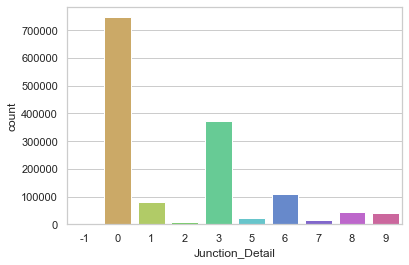

In [658]:
sb.countplot(x="Junction_Detail", data=sample_df9, palette = 'hls')

As shown, the most significant variables that contributes to fatal severity are variable 0 and variable 3. 

**1st Cause: Variable 0: “no junctions within 20m”**
Implications: These roads may be straight roads or highways, hence there are no junctions nearby. It could be that drivers travel at high speeds or they do not pay close attention to the roads because of the lack of junctions. Hence, a mitigation plan should be developed for these areas.

While it is logical to increase the number of junctions in these areas, it may not be feasible as these straight roads or highways are meant to increase ease of mobility and transportation. Hence, a better solution would be to implement more structures for monitoring such as surveillance cameras or have traffic police to oversee these areas. This can force drivers to pay more attention and to drive at slower speeds.

**2nd Cause: Variable 3: “T or staggered junctions”**
Implications: The structure of T or staggered junctions increases risk of occurrence of fatal accidents. Hence, a mitigation plan should be developed for these areas.

While it is logical to replace these junctions with other types of junctions, such as cross roads or roundabouts, this is not feasible as the geographical properties of these areas may not allow this or the other types of junctions serve no purpose in those areas. A better solution would be to develop comprehensive infrastructure plans to modify and improve structure of T or staggered junctions with implementations of additional support structures such as road mirrors to improve visbility for drivers. 


## Eliminating significant unique values in Junction Detail

To observe if the severity of accidents improve with modification in these areas, we have decided to remove approximately half of the values for variables 0 (about 500000) and 3 (about 150000).

In [651]:
new_df = pd.DataFrame(sample_df9.sort_values(by="Junction_Detail", ascending=True))
new_df = new_df.drop(new_df.index[9:500000])

In [652]:
print(new_df.value_counts().sort_index())

Junction_Detail
-1                      8
 0                 247521
 1                  80467
 2                   9233
 3                 374564
 5                  22438
 6                 110524
 7                  16247
 8                  45211
 9                  41363
dtype: int64


In [653]:
new_df = new_df.drop(new_df.index[337230:487230])

In [654]:
print(new_df.value_counts().sort_index())

Junction_Detail
-1                      8
 0                 247521
 1                  80467
 2                   9233
 3                 224564
 5                  22438
 6                 110524
 7                  16247
 8                  45211
 9                  41363
dtype: int64


After removing the data, we combined the new dataframe for "Junction Detail" with the original oversampled dataframe for "Accident Severity", dropping any null values that appear due to the removed data. 

In [655]:
final_df = pd.concat([new_df,sample_df10],axis = 1)

In [656]:
final_df.dropna(how='any', inplace=True)

### Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5919853823752638
Mean Squared Error (MSE) 	: 1.4132956190590824

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.5920388777997332
Mean Squared Error (MSE) 	: 1.4143153755880318

the recall for this model is : 0.0


/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pareenakaur/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.60      0.44      0.51     82663
           2       0.00      0.00      0.00     14458
           3       0.59      0.79      0.68    102273

    accuracy                           0.59    199394
   macro avg       0.40      0.41      0.40    199394
weighted avg       0.55      0.59      0.56    199394



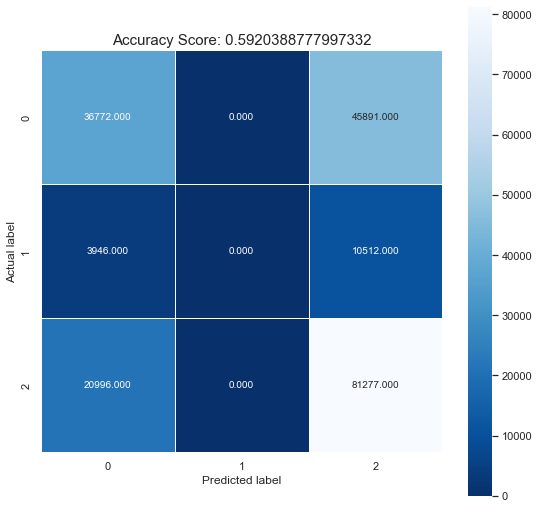

In [657]:
X = final_df[["Junction_Detail"]]
y = final_df["Accident_Severity"]

X_train20, X_test20, y_train20, y_test20 = train_test_split(X,y, test_size = 0.25)

logreg = LogisticRegression()
logreg.fit(X_train20, y_train20)

y_train_pred20 = logreg.predict(X_train20)
y_test_pred20 = logreg.predict(X_test20)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train20, y_train20))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train20, y_train_pred20))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test20, y_test20))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test20, y_test_pred20))
print()

score = logreg.score(X_test20, y_test20)
matrix = metrics.confusion_matrix(y_test20, y_test_pred20)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
matrix = metrics.confusion_matrix(y_test20, y_test_pred20)
print("the recall for this model is :",matrix[1,1]/(matrix[1,1]+matrix[1,0]))

report = classification_report(y_test20, y_test_pred20)
print(report)

The classification accuracy improved significantly with the number of severe accidents decreasing by approximately 70% (with reference to matrix[0][0]). Furthermore, the recall value of severe accidents decreased by 30%. Hence, with modifications to these areas, we can potentially reduce the severity of accidents. 